# **PRAKTIKUM 3 CLUSTERING**



Nama  : Faturrahman Alharitszoe

NIM   : 24060120140138

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **LOAD DATA**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kumpulan Dataset/2021-2022 Players Dataset/2021-2022 Football Player Stats.csv',sep = ';', encoding = 'ISO-8859-1')
pd.set_option('display.max_columns', None)
print(df.head(10))

   Rk             Player Nation Pos           Squad            Comp   Age  \
0   1         Max Aarons    ENG  DF    Norwich City  Premier League  22.0   
1   2   Yunis Abdelhamid    MAR  DF           Reims         Ligue 1  34.0   
2   3  Salis Abdul Samed    GHA  MF   Clermont Foot         Ligue 1  22.0   
3   4    Laurent Abergel    FRA  MF         Lorient         Ligue 1  29.0   
4   5        Charles Abi    FRA  FW   Saint-Étienne         Ligue 1  22.0   
5   6     Dickson Abiama    NGA  FW  Greuther Fürth      Bundesliga  23.0   
6   7     Matthis Abline    FRA  FW          Rennes         Ligue 1  19.0   
7   8      Tammy Abraham    ENG  FW            Roma         Serie A  24.0   
8   9         Luis Abram    PER  DF         Granada         La Liga  26.0   
9  10   Francesco Acerbi    ITA  DF           Lazio         Serie A  34.0   

   Born  MP  Starts   Min   90s  Goals  Shots   SoT  SoT%  G/Sh  G/SoT  \
0  2000  34      32  2881  32.0   0.00   0.41  0.06  15.4  0.00   0.00   
1  1

In [ ]:
for col in df.columns:
    print(col)

Rk
Player
Nation
Pos
Squad
Comp
Age
Born
MP
Starts
Min
90s
Goals
Shots
SoT
SoT%
G/Sh
G/SoT
ShoDist
ShoFK
ShoPK
PKatt
PasTotCmp
PasTotAtt
PasTotCmp%
PasTotDist
PasTotPrgDist
PasShoCmp
PasShoAtt
PasShoCmp%
PasMedCmp
PasMedAtt
PasMedCmp%
PasLonCmp
PasLonAtt
PasLonCmp%
Assists
PasAss
Pas3rd
PPA
CrsPA
PasProg
PasAtt
PasLive
PasDead
PasFK
TB
PasPress
Sw
PasCrs
CK
CkIn
CkOut
CkStr
PasGround
PasLow
PasHigh
PaswLeft
PaswRight
PaswHead
TI
PaswOther
PasCmp
PasOff
PasOut
PasInt
PasBlocks
SCA
ScaPassLive
ScaPassDead
ScaDrib
ScaSh
ScaFld
ScaDef
GCA
GcaPassLive
GcaPassDead
GcaDrib
GcaSh
GcaFld
GcaDef
Tkl
TklWon
TklDef3rd
TklMid3rd
TklAtt3rd
TklDri
TklDriAtt
TklDri%
TklDriPast
Press
PresSucc
Press%
PresDef3rd
PresMid3rd
PresAtt3rd
Blocks
BlkSh
BlkShSv
BlkPass
Int
Tkl+Int
Clr
Err
Touches
TouDefPen
TouDef3rd
TouMid3rd
TouAtt3rd
TouAttPen
TouLive
DriSucc
DriAtt
DriSucc%
DriPast
DriMegs
Carries
CarTotDist
CarPrgDist
CarProg
Car3rd
CPA
CarMis
CarDis
RecTarg
Rec
Rec%
RecProg
CrdY
CrdR
2CrdY
Fls
Fld
Off
Crs


## **Identifying Null Value**

In [ ]:
df.isnull().sum().sum()

2

In [ ]:
df.columns[df.isnull().any()].tolist()

['Nation', 'Age']

In [ ]:
df[df.isnull().any(axis=1)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,PasPress,Sw,PasCrs,CK,CkIn,CkOut,CkStr,PasGround,PasLow,PasHigh,PaswLeft,PaswRight,PaswHead,TI,PaswOther,PasCmp,PasOff,PasOut,PasInt,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Press,PresSucc,Press%,PresDef3rd,PresMid3rd,PresAtt3rd,Blocks,BlkSh,BlkShSv,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,DriSucc,DriAtt,DriSucc%,DriPast,DriMegs,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,RecTarg,Rec,Rec%,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1531,1532,Javier Llabrés,NaN,FWMF,Mallorca,La Liga,NaN,0,5,1,132,1.5,0.0,3.33,1.33,40.0,0.0,0.0,24.5,0.0,0.0,0.0,29.3,42.0,69.8,528.7,88.0,15.3,18.7,82.1,10.7,15.3,69.6,3.33,6.67,50.0,0.0,1.33,1.33,0.67,0.0,0.67,42.0,40.7,1.33,0.0,0.0,9.33,2.67,3.33,0.67,0.0,0.0,0.0,24.0,10.0,8.0,6.0,32.7,1.33,0.67,0.67,29.3,0.67,2.0,0.67,0.0,2.67,1.33,0.0,0.67,0.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.67,0.67,0.67,0.67,1.33,50.0,0.67,10.0,3.33,33.3,1.33,4.67,4.0,0.67,0.0,0.0,0.67,0.0,2.0,0.0,0.0,55.3,0.0,4.0,24.0,29.3,2.67,54.0,2.0,3.33,60.0,2.67,0.0,38.7,178.0,86.0,6.0,0.67,1.33,1.33,2.67,54.0,44.0,81.5,8.0,0.0,0.0,0.0,0.0,0.67,0.67,3.33,2.0,0.0,0.0,0.0,5.33,0.67,2.0,25.0


Menemukan data yang memiliki nilai Nation dan Age yang Null, dikarenakan kebetulan hanya terdapat 1 data yang seperti ini kita dapat menghapusnya.

In [ ]:
df['Pos'].unique()

array(['DF', 'MF', 'FW', 'MFFW', 'FWMF', 'GK', 'DFMF', 'FWDF', 'MFDF',
       'DFFW', 'GKMF'], dtype=object)

Terdapat keanehan pada column Pos karena terdapat Goalkeeper yang juga berposisi sebagai MF dimana hal ini sangat aneh untuk terjadi dalam sepakbola.

In [ ]:
df[df.Pos == 'GKMF']

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,PasPress,Sw,PasCrs,CK,CkIn,CkOut,CkStr,PasGround,PasLow,PasHigh,PaswLeft,PaswRight,PaswHead,TI,PaswOther,PasCmp,PasOff,PasOut,PasInt,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Press,PresSucc,Press%,PresDef3rd,PresMid3rd,PresAtt3rd,Blocks,BlkSh,BlkShSv,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,DriSucc,DriAtt,DriSucc%,DriPast,DriMegs,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,RecTarg,Rec,Rec%,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
2903,2904,Luca Zidane,FRA,GKMF,Rayo Vallecano,La Liga,24.0,1998,8,8,645,7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.5,32.1,73.2,765.7,532.2,4.03,4.03,100.0,9.44,9.58,98.6,10.0,18.5,54.1,0.0,0.0,0.28,0.0,0.0,0.0,32.1,22.6,9.44,2.08,0.0,3.19,0.97,0.0,0.0,0.0,0.0,0.0,15.1,0.97,16.0,3.06,22.5,0.0,0.0,5.69,23.5,0.0,0.83,0.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14,0.0,0.14,0.28,0.0,0.0,0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14,34.6,31.5,34.6,0.14,0.0,0.0,25.1,0.28,0.28,100.0,0.28,0.0,17.6,82.2,43.9,0.0,0.0,0.0,0.0,0.0,14.6,14.6,100.0,0.0,0.0,0.14,0.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


In [ ]:
df.at[2903,'Pos']='GK'

In [ ]:
df[df.Player == 'Luca Zidane']

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,PasPress,Sw,PasCrs,CK,CkIn,CkOut,CkStr,PasGround,PasLow,PasHigh,PaswLeft,PaswRight,PaswHead,TI,PaswOther,PasCmp,PasOff,PasOut,PasInt,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Press,PresSucc,Press%,PresDef3rd,PresMid3rd,PresAtt3rd,Blocks,BlkSh,BlkShSv,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,DriSucc,DriAtt,DriSucc%,DriPast,DriMegs,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,RecTarg,Rec,Rec%,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
2903,2904,Luca Zidane,FRA,GK,Rayo Vallecano,La Liga,24.0,1998,8,8,645,7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.5,32.1,73.2,765.7,532.2,4.03,4.03,100.0,9.44,9.58,98.6,10.0,18.5,54.1,0.0,0.0,0.28,0.0,0.0,0.0,32.1,22.6,9.44,2.08,0.0,3.19,0.97,0.0,0.0,0.0,0.0,0.0,15.1,0.97,16.0,3.06,22.5,0.0,0.0,5.69,23.5,0.0,0.83,0.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14,0.0,0.14,0.28,0.0,0.0,0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14,34.6,31.5,34.6,0.14,0.0,0.0,25.1,0.28,0.28,100.0,0.28,0.0,17.6,82.2,43.9,0.0,0.0,0.0,0.0,0.0,14.6,14.6,100.0,0.0,0.0,0.14,0.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


Pemain diatas telah berhasil diubah posisinya sesuai dengan posisi aslinya

In [ ]:
df = df.drop(1531)

In [ ]:
df[df.Player == 'Javier Llabrés']

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,PasPress,Sw,PasCrs,CK,CkIn,CkOut,CkStr,PasGround,PasLow,PasHigh,PaswLeft,PaswRight,PaswHead,TI,PaswOther,PasCmp,PasOff,PasOut,PasInt,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Press,PresSucc,Press%,PresDef3rd,PresMid3rd,PresAtt3rd,Blocks,BlkSh,BlkShSv,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,DriSucc,DriAtt,DriSucc%,DriPast,DriMegs,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,RecTarg,Rec,Rec%,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%


Pemain dengan nation dan age yang kosong telah dapat dihapus

In [ ]:
df = df.drop(['Rk', 'Born'], axis = 1)

In [ ]:
print(df.head(5))

              Player Nation Pos          Squad            Comp   Age  MP  \
0         Max Aarons    ENG  DF   Norwich City  Premier League  22.0  34   
1   Yunis Abdelhamid    MAR  DF          Reims         Ligue 1  34.0  34   
2  Salis Abdul Samed    GHA  MF  Clermont Foot         Ligue 1  22.0  31   
3    Laurent Abergel    FRA  MF        Lorient         Ligue 1  29.0  34   
4        Charles Abi    FRA  FW  Saint-Étienne         Ligue 1  22.0   1   

   Starts   Min   90s  Goals  Shots   SoT  SoT%  G/Sh  G/SoT  ShoDist  ShoFK  \
0      32  2881  32.0   0.00   0.41  0.06  15.4  0.00   0.00     20.5    0.0   
1      34  2983  33.1   0.06   0.54  0.18  33.3  0.11   0.33     18.7    0.0   
2      29  2462  27.4   0.04   0.66  0.18  27.8  0.06   0.20     20.3    0.0   
3      34  2956  32.8   0.00   0.91  0.21  23.3  0.00   0.00     22.6    0.0   
4       1    45   0.5   0.00   0.00  0.00   0.0  0.00   0.00      0.0    0.0   

   ShoPK  PKatt  PasTotCmp  PasTotAtt  PasTotCmp%  PasTotDist 

In [ ]:
df = df[df['Pos'].str.contains('FW')]
df = df[df['Min']>2500]

In [ ]:
print(df.head(5))

           Player Nation   Pos        Squad            Comp   Age  MP  Starts  \
7   Tammy Abraham    ENG    FW         Roma         Serie A  24.0  37      36   
13      Che Adams    SCO    FW  Southampton  Premier League  25.0  30      23   
17     Amine Adli    FRA  FWMF   Leverkusen      Bundesliga  22.0  25      13   
18    Yacine Adli    FRA  MFFW     Bordeaux         Ligue 1  21.0  36      25   
24  Kevin Agudelo    COL  MFFW       Spezia         Serie A  23.0  23      12   

     Min   90s  Goals  Shots   SoT  SoT%  G/Sh  G/SoT  ShoDist   SCA  ScaDrib  \
7   3084  34.3   0.50   2.71  0.93  34.4  0.15   0.44     12.2  2.33     0.03   
13  2039  22.7   0.31   2.16  1.06  49.0  0.14   0.29     12.9  2.25     0.04   
17  1256  14.0   0.21   2.71  1.36  50.0  0.08   0.16     15.3  3.36     0.21   
18  2260  25.1   0.04   1.31  0.60  45.5  0.03   0.07     19.9  4.10     0.16   
24  1237  13.7   0.22   1.61  0.80  50.0  0.14   0.27     16.6  2.77     0.51   

    ScaSh   GCA  GcaDrib  

Data telah berhasil di filter berdasarkan posisi dari pemain yang saya ingin cluster yaitu yang berposisi sebagai penyerang.

In [ ]:
selected_col = ['Player','Nation','Pos','Squad','Comp','Age','MP','Starts','Min','90s','Goals','Shots','SoT','SoT%','G/Sh','G/SoT','ShoDist','SCA','ScaDrib','ScaSh','GCA','GcaDrib','GcaSh','TouAtt3rd','TouAttPen','AerWon','AerLost','AerWon%']
df = df.loc[:,selected_col]
print(df.head(10))
print(df.shape)

                Player Nation   Pos        Squad            Comp   Age  MP  \
7        Tammy Abraham    ENG    FW         Roma         Serie A  24.0  37   
36     Ludovic Ajorque    REU    FW   Strasbourg         Ligue 1  28.0  36   
90     Felipe Anderson    BRA    FW        Lazio         Serie A  29.0  38   
104    Michail Antonio    JAM    FW     West Ham  Premier League  32.0  36   
106      Houssem Aouar    FRA  MFFW         Lyon         Ligue 1  23.0  36   
121   Marko Arnautovi?    AUT    FW      Bologna         Serie A  33.0  33   
136         Iago Aspas    ESP    FW   Celta Vigo         La Liga  34.0  37   
265  Wissam Ben Yedder    FRA    FW       Monaco         Ligue 1  31.0  37   
284      Karim Benzema    FRA    FW  Real Madrid         La Liga  34.0  32   
286   Domenico Berardi    ITA    FW     Sassuolo         Serie A  27.0  33   

     Starts   Min   90s  Goals  Shots   SoT  SoT%  G/Sh  G/SoT  ShoDist   SCA  \
7        36  3084  34.3   0.50   2.71  0.93  34.4  0.15   0.

In [ ]:
print(df[df['Player'] == "Teemu Pukki"])
print(df[df['Player'] == "Ollie Watkins"])

           Player Nation Pos         Squad            Comp   Age  MP  Starts  \
2181  Teemu Pukki    FIN  FW  Norwich City  Premier League  32.0  37      37   

       Min   90s  Goals  Shots   SoT  SoT%  G/Sh  G/SoT  ShoDist   SCA  \
2181  3253  36.1    0.3   1.88  0.66  35.3  0.12   0.33     14.9  1.66   

      ScaDrib  ScaSh   GCA  GcaDrib  GcaSh  TouAtt3rd  TouAttPen  AerWon  \
2181     0.25   0.06  0.11      0.0    0.0       12.3       4.85    0.44   

      AerLost  AerWon%  
2181     2.99     12.9  
             Player Nation Pos        Squad            Comp   Age  MP  Starts  \
2827  Ollie Watkins    ENG  FW  Aston Villa  Premier League  26.0  35      33   

       Min   90s  Goals  Shots   SoT  SoT%  G/Sh  G/SoT  ShoDist  SCA  \
2827  2952  32.8   0.34   2.35  0.95  40.3  0.13   0.32     13.5  2.2   

      ScaDrib  ScaSh   GCA  GcaDrib  GcaSh  TouAtt3rd  TouAttPen  AerWon  \
2827     0.18   0.21  0.24     0.03   0.06       18.4       5.67    2.68   

      AerLost  AerWon%  

In [ ]:
df[df['Player']]

In [ ]:
# X1 = 
X = df[['Shots','Goals']].values
X

array([[2.71, 0.5 ],
       [2.16, 0.31],
       [2.71, 0.21],
       [1.31, 0.04],
       [1.61, 0.22],
       [1.94, 0.39],
       [0.32, 0.08],
       [1.02, 0.17],
       [2.06, 0.2 ],
       [2.55, 0.06],
       [1.68, 0.05],
       [1.37, 0.19],
       [2.5 , 0.21],
       [2.52, 0.3 ],
       [2.3 , 0.08],
       [2.77, 0.22],
       [1.83, 0.  ],
       [2.45, 0.3 ],
       [2.99, 0.13],
       [3.04, 0.47],
       [1.79, 0.17],
       [3.33, 0.52],
       [2.45, 0.5 ],
       [3.17, 0.92],
       [2.87, 0.35],
       [2.88, 0.29],
       [2.73, 0.62],
       [1.56, 0.13],
       [1.97, 0.25],
       [2.24, 0.26],
       [1.36, 0.11],
       [1.9 , 0.22],
       [1.89, 0.04],
       [1.85, 0.42],
       [2.17, 0.16],
       [2.88, 0.26],
       [3.04, 0.25],
       [2.  , 0.33],
       [2.31, 0.52],
       [1.94, 0.3 ],
       [1.9 , 0.21],
       [1.87, 0.27],
       [3.62, 0.53],
       [2.31, 0.89],
       [2.61, 0.33],
       [3.07, 0.31],
       [4.1 , 0.94],
       [3.29,

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,10):
  kmeans= KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

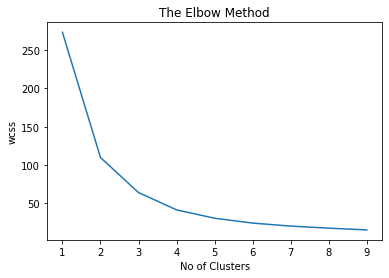

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show

In [ ]:
kmeansmodel = KMeans(n_clusters = 4,init='k-means++',random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)

In [ ]:
y_kmeans

array([3, 0, 3, 1, 1, 0, 1, 1, 0, 3, 1, 1, 3, 3, 0, 3, 0, 3, 3, 3, 0, 2,
       3, 2, 3, 3, 3, 1, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 0,
       3, 3, 2, 2, 0, 0, 3, 3, 3, 3, 0, 3, 1, 0, 1, 1, 3, 3, 1, 0, 0, 0,
       0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 1, 3, 3, 1, 1, 1, 3,
       3, 3, 3, 0, 0, 0, 0, 2, 2, 3, 0, 3, 1, 3, 3, 1, 3, 3, 0, 3, 3, 0,
       1, 0, 0, 0, 1, 1, 2, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 3, 1, 1,
       0, 3, 1, 0, 1, 0, 1, 0, 2, 3, 3, 3, 0, 0, 1, 1, 1, 3, 3, 1, 3, 0,
       1, 0, 3, 0, 0, 3, 0, 2, 3, 0, 0, 2, 3, 0, 2, 1, 2, 0, 0, 1, 1, 3,
       1, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 2, 0, 3, 3, 1, 1, 0, 0,
       3, 3, 0, 1, 1, 0, 3, 2, 2, 0, 3, 3, 1, 0, 3, 3, 1, 2, 0, 0, 0, 1,
       3, 3, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 3, 0, 1, 3, 0, 0, 1, 1, 3, 3,
       0, 1, 2, 2, 0, 3, 1, 0, 3, 3, 3, 0, 3, 3, 3, 2, 1, 3, 2, 3, 3, 1,
       3, 0, 3, 2, 1, 3, 0, 0, 1, 2, 0, 0, 1, 3, 2, 3, 2, 1, 0, 3, 1, 0,
       1, 2, 0, 0, 0, 0, 3, 1, 3, 3, 0, 2, 3, 0, 1,

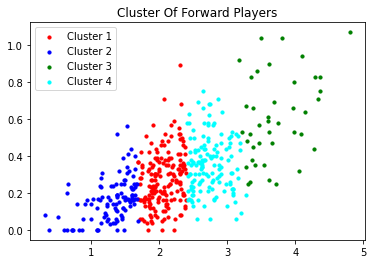

In [ ]:
plt.scatter(X[y_kmeans ==0,0], X[y_kmeans == 0,1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans ==1,0], X[y_kmeans == 1,1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans ==2,0], X[y_kmeans == 2,1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans ==3,0], X[y_kmeans == 3,1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.title('Cluster Of Forward Players')
# plt.ylim(0,5)
plt.legend()
plt.show()


In [ ]:
df['Goals'].max()

1.07

In [ ]:
df[df.Goals == 5.0]

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,SCA,ScaDrib,ScaSh,GCA,GcaDrib,GcaSh,TouAtt3rd,TouAttPen,AerWon,AerLost,AerWon%
